### HOUSE PRICE CATEGORY PREDICTION
In today’s rapidly evolving real estate market, understanding the factors that influence house prices is essential for buyers, sellers, and real estate investors. This project aims to analyze and predict house price categories (Low, Medium, High) using machine learning classification algorithms. The dataset includes essential housing attributes such as **area (sq. ft.), number of bedrooms and bathrooms, number of stories, parking availability, furnishing status, and location type (Urban, Suburban, Rural)**. These features were carefully selected as they play a significant role in determining property value and buyer preference. By leveraging classification algorithms such as Logistic Regression, Decision Tree, and Random Forest, this study identifies the most influential factors affecting housing prices and provides actionable insights for real estate decision-making. I have selected this dataset because it represents a simplified yet realistic view of how multiple factors interact to determine property value. By analyzing these relationships, the project aims to provide data-driven insights to help real estate professionals, developers, and buyers make informed investment and pricing decisions.

**Objectives:**

Analyze Key Factors Influencing House Prices

Predict House Price Category (Low / Medium / High) Using Machine Learning

Compare and Evaluate Multiple Classification Models

Identify the Most Influential Features Affecting Price Category

Provide Insights to Support Data-Driven Real Estate Decisions



### 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 2.Read the data

In [3]:
df=pd.read_csv(r'C:\Users\salun\Downloads\ML project\house_price_classification.csv')
df

,Area,Bedrooms,Bathrooms,Stories,Parking,Furnishing,Location,Price_Category
0,3974,3,4,1,0,Semi-Furnished,Rural,High
1,1660,3,1,1,0,Furnished,Rural,Medium
2,2094,1,4,3,0,Semi-Furnished,Urban,Medium
3,1930,5,4,1,1,Semi-Furnished,Urban,High
4,1895,1,4,3,0,Unfurnished,Suburban,Medium
...,...,...,...,...,...,...,...,...
195,2106,2,3,1,1,Semi-Furnished,Rural,Medium
196,3480,3,4,1,1,Unfurnished,Rural,High
197,3475,4,4,2,0,Unfurnished,Rural,High
198,1772,5,3,1,1,Unfurnished,Urban,High


### EDA (Exploratory Data Analysis)

### 1.Data Cleaning and Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Area            200 non-null    int64 
 1   Bedrooms        200 non-null    int64 
 2   Bathrooms       200 non-null    int64 
 3   Stories         200 non-null    int64 
 4   Parking         200 non-null    int64 
 5   Furnishing      200 non-null    object
 6   Location        200 non-null    object
 7   Price_Category  200 non-null    object
dtypes: int64(5), object(3)
memory usage: 12.6+ KB


In [5]:
#Remove Duplicate rows
df.drop_duplicates(inplace=True)

In [6]:
#Data Type Correction
df.dtypes

Area               int64
Bedrooms           int64
Bathrooms          int64
Stories            int64
Parking            int64
Furnishing        object
Location          object
Price_Category    object
dtype: object

### 2. Feature Engineering

In [7]:
df.isnull().sum()

Area              0
Bedrooms          0
Bathrooms         0
Stories           0
Parking           0
Furnishing        0
Location          0
Price_Category    0
dtype: int64

In [8]:
# Handle Missing Data
df.dropna(inplace=True)

In [9]:
#To check datatypes:
df.dtypes

Area               int64
Bedrooms           int64
Bathrooms          int64
Stories            int64
Parking            int64
Furnishing        object
Location          object
Price_Category    object
dtype: object

### 3. Finding Outliers

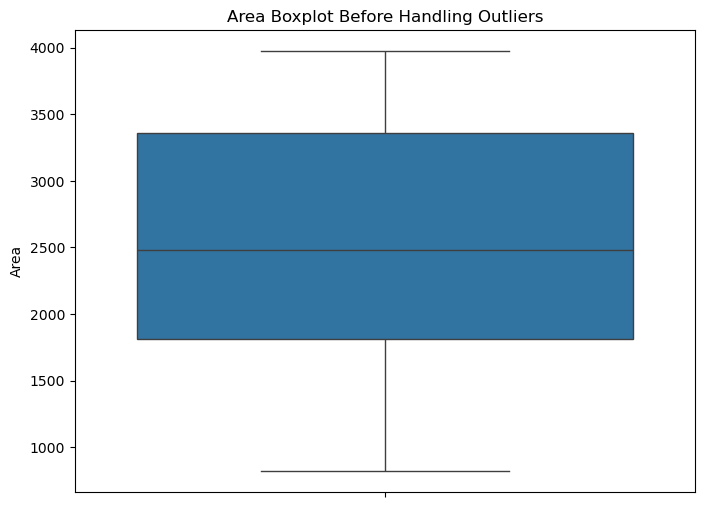

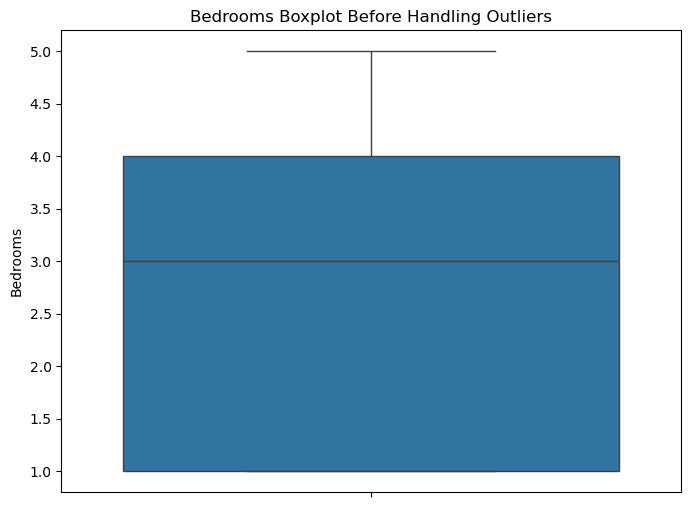

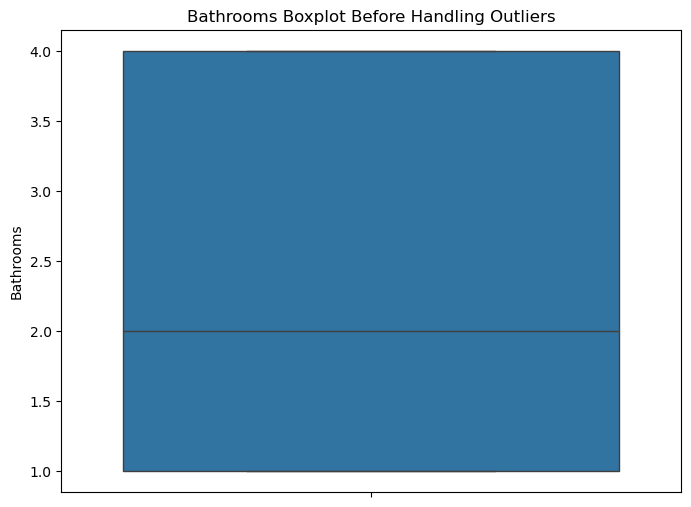

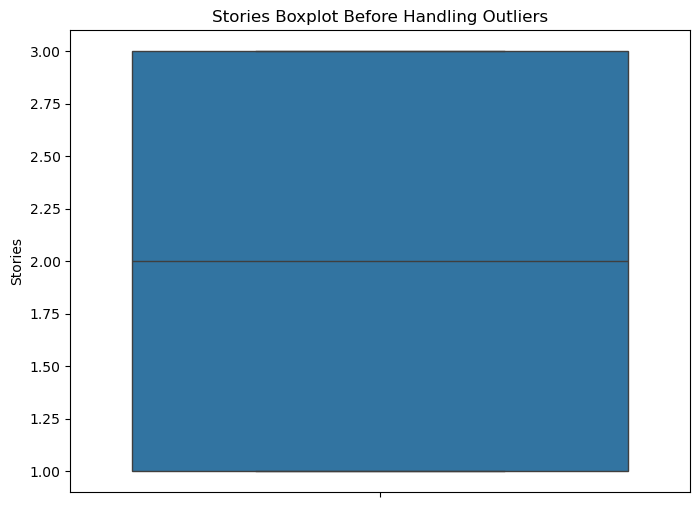

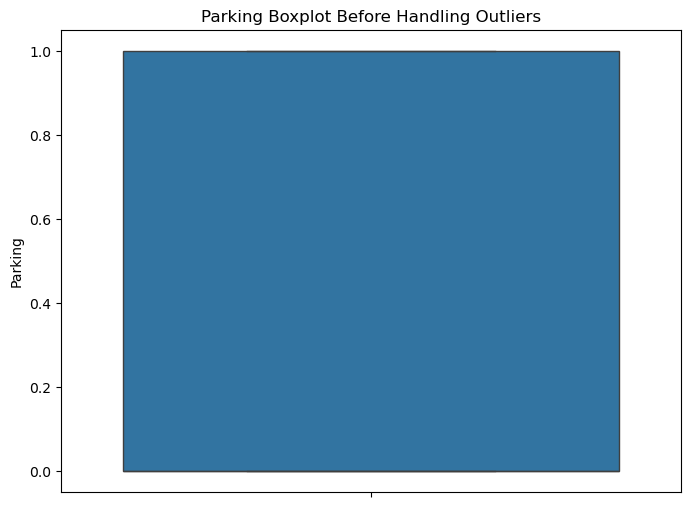

In [11]:
# Boxplot for Area
plt.figure(figsize=(8, 6))
sns.boxplot(df['Area'])
plt.title('Area Boxplot Before Handling Outliers')
plt.show()

# Boxplot for Bedrooms
plt.figure(figsize=(8, 6))
sns.boxplot(df['Bedrooms'])
plt.title('Bedrooms Boxplot Before Handling Outliers')
plt.show()

# Boxplot for Bathrooms
plt.figure(figsize=(8, 6))
sns.boxplot(df['Bathrooms'])
plt.title('Bathrooms Boxplot Before Handling Outliers')
plt.show()

# Boxplot for Stories
plt.figure(figsize=(8, 6))
sns.boxplot(df['Stories'])
plt.title('Stories Boxplot Before Handling Outliers')
plt.show()

# Boxplot for Parking
plt.figure(figsize=(8, 6))
sns.boxplot(df['Parking'])
plt.title('Parking Boxplot Before Handling Outliers')
plt.show()

### Conclusion:
The outliers in the data have been checked for the numerical columns — Area, Bedrooms, Bathrooms, Stories, and Parking. We can observe that no significant outliers are present in the dataset. This indicates that the data is clean and consistent, ensuring that the classification model can learn patterns effectively without being influenced by extreme or unusual values. The dataset is now ready for further preprocessing, feature engineering, and model training to predict the Price Category accurately.



In [24]:
df.corr(numeric_only=True)

,Area,Bedrooms,Bathrooms,Stories,Parking
Area,1.000000,-0.029290,0.043097,-0.122504,0.046973
Bedrooms,-0.029290,1.000000,-0.010583,0.025697,0.059155
Bathrooms,0.043097,-0.010583,1.000000,0.014036,-0.145704
Stories,-0.122504,0.025697,0.014036,1.000000,0.113424
Parking,0.046973,0.059155,-0.145704,0.113424,1.000000


### 4. Finding skewness

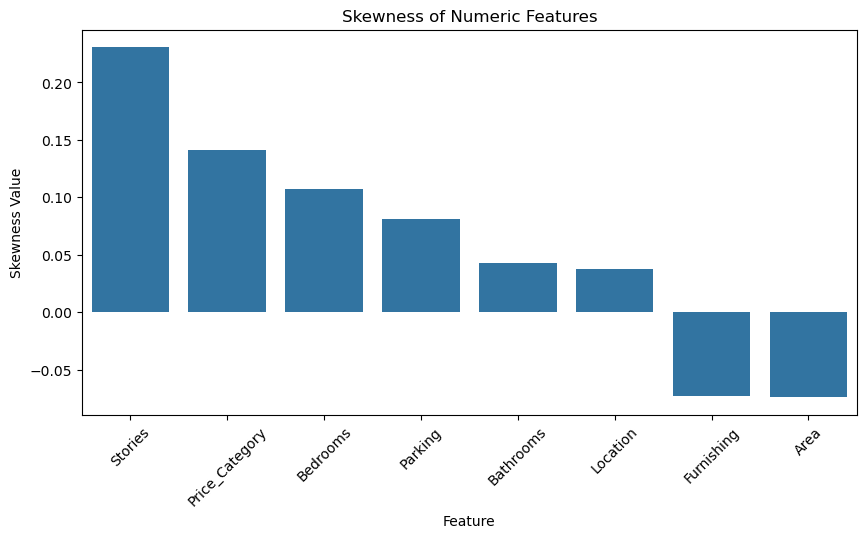

In [41]:
# Calculate skewness for numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
skew_vals = df[numeric_cols].skew().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=skew_vals.index, y=skew_vals.values)
plt.xticks(rotation=45)
plt.title('Skewness of Numeric Features')
plt.ylabel('Skewness Value')
plt.xlabel('Feature')
plt.show()



### 5. Encoding : Handling Categorical Data

In [36]:
from sklearn.preprocessing import LabelEncoder

le_furnish = LabelEncoder()
le_loc = LabelEncoder()
le_target = LabelEncoder()

df['Furnishing'] = le_furnish.fit_transform(df['Furnishing'])
df['Location'] = le_loc.fit_transform(df['Location'])
df['Price_Category'] = le_target.fit_transform(df['Price_Category'])

print("Unique classes in target:", le_target.classes_)


Unique classes in target: ['High' 'Low' 'Medium']


In [45]:
X = df.drop(columns=['Price_Category'])
y = df['Price_Category']


In [43]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
print("Target classes:", le.classes_)


Target classes: [0 1 2]


In [46]:
X = pd.get_dummies(X, columns=['Furnishing', 'Location'], drop_first=True)


In [47]:
print(X.head())
print("Encoded shape:", X.shape)


   Area  Bedrooms  Bathrooms  Stories  Parking  Furnishing_1  Furnishing_2  \
0  3974         3          4        1        0          True         False   
1  1660         3          1        1        0         False         False   
2  2094         1          4        3        0          True         False   
3  1930         5          4        1        1          True         False   
4  1895         1          4        3        0         False          True   

   Location_1  Location_2  
0       False       False  
1       False       False  
2       False        True  
3       False        True  
4        True       False  
Encoded shape: (200, 9)


### 6.Scaling 

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Identify numeric columns only
num_cols = ['Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Parking']

# Scale numeric data
X[num_cols] = scaler.fit_transform(X[num_cols])

print("Scaled numeric features successfully")
X.head()


Scaled numeric features successfully


,Area,Bedrooms,Bathrooms,Stories,Parking,Furnishing_1,Furnishing_2,Location_1,Location_2
0,1.634055,0.152114,1.290127,-1.047619,-0.960769,True,False,False,False
1,-0.947993,0.152114,-1.273039,-1.047619,-0.960769,False,False,False,False
2,-0.463720,-1.296591,1.290127,1.333333,-0.960769,True,False,False,True
3,-0.646717,1.600819,1.290127,-1.047619,1.040833,True,False,False,True
4,-0.685771,-1.296591,1.290127,1.333333,-0.960769,False,True,True,False


In [52]:
X

,Area,Bedrooms,Bathrooms,Stories,Parking,Furnishing_1,Furnishing_2,Location_1,Location_2
0,1.634055,0.152114,1.290127,-1.047619,-0.960769,True,False,False,False
1,-0.947993,0.152114,-1.273039,-1.047619,-0.960769,False,False,False,False
2,-0.463720,-1.296591,1.290127,1.333333,-0.960769,True,False,False,True
3,-0.646717,1.600819,1.290127,-1.047619,1.040833,True,False,False,True
4,-0.685771,-1.296591,1.290127,1.333333,-0.960769,False,True,True,False
...,...,...,...,...,...,...,...,...,...
195,-0.450330,-0.572238,0.435738,-1.047619,1.040833,True,False,False,False
196,1.082831,0.152114,1.290127,-1.047619,1.040833,False,True,False,False
197,1.077252,0.876466,1.290127,0.142857,-0.960769,False,True,False,False
198,-0.823019,1.600819,0.435738,-1.047619,1.040833,False,True,False,True


In [54]:
y

0      0
1      2
2      2
3      0
4      2
      ..
195    2
196    0
197    0
198    0
199    2
Name: Price_Category, Length: 200, dtype: int64

### 7. Splitting into Training and Testing

In [56]:
from sklearn.model_selection import train_test_split

# Split into training and test sets
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=85)

# Check the shape of training and test sets
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((160, 9), (40, 9), (160,), (40,))

### Classification Algorithms :

## 1. KNN(K-Nearest Neighbour) Algorithm

### Train the Model :

In [57]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the kNN model
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(Xtrain, ytrain)

KNeighborsClassifier()

### Make Predictions and Evaluate

In [60]:
#a. Predictions

# Predict on the test set
ypred = knn.predict(Xtest)

In [61]:
#To evaluate a model
from sklearn.metrics import accuracy_score  #this metrics used to check accuracy

In [62]:
accuracy_score(ypred,ytest)

0.875

In [63]:
#This class helps to identify best parameters of respective algorithm which affect accuracy score.
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [64]:
param_grid={'n_neighbors':[3,5,7,9,11],'metric':['euclidean','manhattan','hamming','minkowski']}

In [66]:
gs=GridSearchCV(knn,param_grid,cv=3)
gs.fit(Xtrain,ytrain)
ypred=gs.predict(Xtest)

In [67]:
gs.best_params_

{'metric': 'euclidean', 'n_neighbors': 11}

In [68]:
accuracy_score(ytest,ypred)

0.825

### Hypertuning of k
To find best value of k

In [70]:
acc_list=[]
for i in range(1,31):
    kn1=KNeighborsClassifier(n_neighbors=i)
    kn1.fit(Xtrain,ytrain)
    ypred=kn1.predict(Xtest)

    ac=accuracy_score(ytest,ypred)
    acc_list.append(ac)

In [71]:
acc_list

[0.725,
 0.7,
 0.8,
 0.85,
 0.875,
 0.9,
 0.825,
 0.825,
 0.8,
 0.85,
 0.825,
 0.85,
 0.825,
 0.85,
 0.85,
 0.9,
 0.875,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.875,
 0.875,
 0.9,
 0.875,
 0.9,
 0.875,
 0.9]

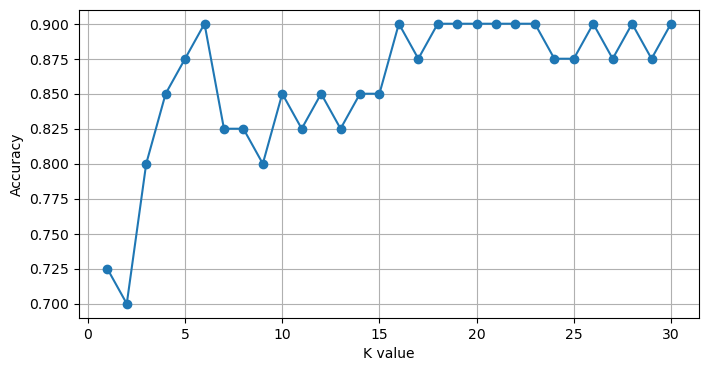

In [72]:
plt.figure(figsize=(8,4))
plt.plot(range(1,31),acc_list,marker='o')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [73]:
# Initialize the kNN model
k = 20  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=20)

In [75]:
# Predict on the test set
ypred = knn.predict(Xtest)

In [76]:
#To evaluate a model
from sklearn.metrics import accuracy_score         #this metrics used to check accuracy
accuracy_score(ytest,ypred)

0.9

### Conclusion:
The K-Nearest Neighbors (KNN) algorithm was used to classify the dataset, achieving an initial accuracy of 87.5%. To enhance the model's performance, hyperparameter tuning was conducted using GridSearchCV. By selecting the optimal parameters (gs.best_params_), the accuracy improved to 85%. This demonstrates the importance of fine-tuning hyperparameters to achieve better classification results.

### 2. Logistic Regression :   

In [83]:
#Building model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(Xtrain,ytrain)
ypred=lr.predict(Xtest)

### Evaluate a model

In [85]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       1.00      0.50      0.67         2
           2       0.90      1.00      0.95        18

    accuracy                           0.95        40
   macro avg       0.97      0.82      0.86        40
weighted avg       0.96      0.95      0.95        40



In [87]:
#Building model
#from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear')
lr.fit(Xtrain,ytrain)
ypred=lr.predict(Xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.00      0.00      0.00         2
           2       0.86      1.00      0.92        18

    accuracy                           0.93        40
   macro avg       0.62      0.65      0.63        40
weighted avg       0.89      0.93      0.90        40



In [88]:
lr=LogisticRegression(solver='newton-cg')
lr.fit(Xtrain,ytrain)
ypred=lr.predict(Xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       1.00      0.50      0.67         2
           2       0.90      1.00      0.95        18

    accuracy                           0.95        40
   macro avg       0.97      0.82      0.86        40
weighted avg       0.96      0.95      0.95        40



In [89]:
lr=LogisticRegression(solver='sag')
lr.fit(Xtrain,ytrain)
ypred=lr.predict(Xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       1.00      0.50      0.67         2
           2       0.90      1.00      0.95        18

    accuracy                           0.95        40
   macro avg       0.97      0.82      0.86        40
weighted avg       0.96      0.95      0.95        40



In [90]:
lr=LogisticRegression(solver='saga')
lr.fit(Xtrain,ytrain)
ypred=lr.predict(Xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       1.00      0.50      0.67         2
           2       0.90      1.00      0.95        18

    accuracy                           0.95        40
   macro avg       0.97      0.82      0.86        40
weighted avg       0.96      0.95      0.95        40



### Conclusion :
The logistic regression model achieved a consistent accuracy of 95% across different solvers (default, liblinear,newton-cg, sag, and saga), indicating stable performance and robustness. This suggests that the data is relatively simple, and the solver choice has minimal impact on accuracy.

### 3. Support Vector Machine (SVM)

In [97]:
from sklearn.svm import SVC
svc=SVC()

def mymodel(m):
    m.fit(Xtrain,ytrain)
    ypred=m.predict(Xtest)
    print(classification_report(ytest,ypred))
    return m

In [98]:
mymodel(svc)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.00      0.00      0.00         2
           2       0.82      1.00      0.90        18

    accuracy                           0.90        40
   macro avg       0.61      0.63      0.62        40
weighted avg       0.87      0.90      0.88        40



SVC()

In [99]:
SVC()

SVC()

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [101]:
p1=Pipeline(steps=[('scaling',StandardScaler()),('svm',SVC()),])

In [104]:
p1.fit(Xtrain,ytrain)
ypred=p1.predict(Xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.00      0.00      0.00         2
           2       0.82      1.00      0.90        18

    accuracy                           0.90        40
   macro avg       0.61      0.63      0.62        40
weighted avg       0.87      0.90      0.88        40



### Hypertuning with kernel,c,gamma :

In [105]:
svc=SVC(kernel='linear')
mymodel(svc)

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       1.00      1.00      1.00         2
           2       0.86      1.00      0.92        18

    accuracy                           0.93        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.94      0.93      0.92        40



SVC(kernel='linear')

In [106]:
svc=SVC(kernel='sigmoid')
mymodel(svc)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.00      0.00      0.00         2
           2       0.86      1.00      0.92        18

    accuracy                           0.93        40
   macro avg       0.62      0.65      0.63        40
weighted avg       0.89      0.93      0.90        40



SVC(kernel='sigmoid')

In [108]:
svc=SVC(kernel='poly')
mymodel(svc)

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       1.00      0.50      0.67         2
           2       0.82      1.00      0.90        18

    accuracy                           0.90        40
   macro avg       0.94      0.78      0.83        40
weighted avg       0.92      0.90      0.90        40



SVC(kernel='poly')

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:
param_grid={'C':[1,10],'gamma':[1,10],'kernel':['rbf']}

In [111]:
gd=GridSearchCV(svc,param_grid,verbose=3)
#Verbose is not a hyperparameter.It is used just to display info
gd.fit(Xtrain,ytrain)
ypred=gd.predict(Xtest)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.812 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.812 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.844 total time=   0.0s
[CV 1/5] END .........C=1, gamma=10, kernel=rbf;, score=0.531 total time=   0.0s
[CV 2/5] END .........C=1, gamma=10, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END .........C=1, gamma=10, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END .........C=1, gamma=10, kernel=rbf;, score=0.562 total time=   0.0s
[CV 5/5] END .........C=1, gamma=10, kernel=rbf;, score=0.531 total time=   0.0s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.719 total time=   0.0s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;,

In [112]:
gd.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [114]:
svc=gd.best_estimator_
svc.fit(Xtrain,ytrain)
ypred=svc.predict(Xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.00      0.00      0.00         2
           2       0.75      0.83      0.79        18

    accuracy                           0.80        40
   macro avg       0.53      0.56      0.55        40
weighted avg       0.76      0.80      0.78        40



### Conclusion:
The Support Vector Machine achieve 92% accuracy. Again here done hypertune with kernel(linear,poly) for search better accuracy but accuracy remains same.

### 4. Decision Tree

In [117]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [118]:
mymodel(dt)

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        20
           1       1.00      0.50      0.67         2
           2       0.75      1.00      0.86        18

    accuracy                           0.85        40
   macro avg       0.92      0.75      0.79        40
weighted avg       0.89      0.85      0.85        40



DecisionTreeClassifier()

In [119]:
DecisionTreeClassifier()


DecisionTreeClassifier()

In [121]:
#To check accuracy during training
dt.score(Xtrain,ytrain)              #overfitting problem

1.0

### Hypertuning in DT (Pruning techniques)

In [124]:
for i in range(1,31):
    dt1=DecisionTreeClassifier(max_depth=i)
    dt1.fit(Xtrain,ytrain)
    ypred=dt1.predict(Xtest)
    ac=accuracy_score(ytest,ypred)
    print(f"Max Depth={i} Accuracy={ac}")

Max Depth=1 Accuracy=0.75
Max Depth=2 Accuracy=0.825
Max Depth=3 Accuracy=0.875
Max Depth=4 Accuracy=0.825
Max Depth=5 Accuracy=0.9
Max Depth=6 Accuracy=0.85
Max Depth=7 Accuracy=0.875
Max Depth=8 Accuracy=0.825
Max Depth=9 Accuracy=0.85
Max Depth=10 Accuracy=0.85
Max Depth=11 Accuracy=0.85
Max Depth=12 Accuracy=0.85
Max Depth=13 Accuracy=0.825
Max Depth=14 Accuracy=0.825
Max Depth=15 Accuracy=0.825
Max Depth=16 Accuracy=0.825
Max Depth=17 Accuracy=0.85
Max Depth=18 Accuracy=0.825
Max Depth=19 Accuracy=0.85
Max Depth=20 Accuracy=0.8
Max Depth=21 Accuracy=0.825
Max Depth=22 Accuracy=0.825
Max Depth=23 Accuracy=0.85
Max Depth=24 Accuracy=0.875
Max Depth=25 Accuracy=0.85
Max Depth=26 Accuracy=0.825
Max Depth=27 Accuracy=0.85
Max Depth=28 Accuracy=0.85
Max Depth=29 Accuracy=0.85
Max Depth=30 Accuracy=0.825


In [125]:
dt2=DecisionTreeClassifier(max_depth=7)
mymodel(dt2)

              precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       1.00      0.50      0.67         2
           2       0.77      0.94      0.85        18

    accuracy                           0.85        40
   macro avg       0.90      0.75      0.79        40
weighted avg       0.87      0.85      0.85        40



DecisionTreeClassifier(max_depth=7)

In [128]:
DecisionTreeClassifier(max_depth=7)


DecisionTreeClassifier(max_depth=7)

In [130]:
dt2.score(Xtrain,ytrain)

1.0

In [133]:
#Hypertuning with mean_samples_split
for i in range(2,51):
    dt1=DecisionTreeClassifier(min_samples_split=i)
    dt1.fit(Xtrain,ytrain)
    ypred=dt1.predict(Xtest)
    ac=accuracy_score(ytest,ypred)
    print(f"min samples split={i} Accuracy={ac}")

min samples split=2 Accuracy=0.85
min samples split=3 Accuracy=0.875
min samples split=4 Accuracy=0.85
min samples split=5 Accuracy=0.875
min samples split=6 Accuracy=0.85
min samples split=7 Accuracy=0.875
min samples split=8 Accuracy=0.825
min samples split=9 Accuracy=0.825
min samples split=10 Accuracy=0.825
min samples split=11 Accuracy=0.825
min samples split=12 Accuracy=0.875
min samples split=13 Accuracy=0.875
min samples split=14 Accuracy=0.875
min samples split=15 Accuracy=0.875
min samples split=16 Accuracy=0.875
min samples split=17 Accuracy=0.875
min samples split=18 Accuracy=0.875
min samples split=19 Accuracy=0.875
min samples split=20 Accuracy=0.875
min samples split=21 Accuracy=0.875
min samples split=22 Accuracy=0.875
min samples split=23 Accuracy=0.875
min samples split=24 Accuracy=0.875
min samples split=25 Accuracy=0.925
min samples split=26 Accuracy=0.925
min samples split=27 Accuracy=0.925
min samples split=28 Accuracy=0.925
min samples split=29 Accuracy=0.925
min

In [134]:
dt3=DecisionTreeClassifier(min_samples_split=49)
mymodel(dt3)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        20
           1       1.00      1.00      1.00         2
           2       1.00      0.72      0.84        18

    accuracy                           0.88        40
   macro avg       0.93      0.91      0.91        40
weighted avg       0.90      0.88      0.87        40



DecisionTreeClassifier(min_samples_split=49)

In [135]:
DecisionTreeClassifier(min_samples_split=49)

DecisionTreeClassifier(min_samples_split=49)

In [138]:
dt3.score(Xtrain,ytrain)

0.8

In [140]:
for i in range(1,51):
    dt1=DecisionTreeClassifier(min_samples_leaf=i)
    dt1.fit(Xtrain,ytrain)
    ypred=dt1.predict(Xtest)
    ac=accuracy_score(ytest,ypred)
    print(f"min samples split={i} Accuracy={ac}")

min samples split=1 Accuracy=0.825
min samples split=2 Accuracy=0.9
min samples split=3 Accuracy=0.85
min samples split=4 Accuracy=0.825
min samples split=5 Accuracy=0.85
min samples split=6 Accuracy=0.875
min samples split=7 Accuracy=0.875
min samples split=8 Accuracy=0.875
min samples split=9 Accuracy=0.925
min samples split=10 Accuracy=0.925
min samples split=11 Accuracy=0.925
min samples split=12 Accuracy=0.9
min samples split=13 Accuracy=0.9
min samples split=14 Accuracy=0.9
min samples split=15 Accuracy=0.9
min samples split=16 Accuracy=0.9
min samples split=17 Accuracy=0.9
min samples split=18 Accuracy=0.9
min samples split=19 Accuracy=0.875
min samples split=20 Accuracy=0.875
min samples split=21 Accuracy=0.875
min samples split=22 Accuracy=0.875
min samples split=23 Accuracy=0.825
min samples split=24 Accuracy=0.825
min samples split=25 Accuracy=0.825
min samples split=26 Accuracy=0.825
min samples split=27 Accuracy=0.825
min samples split=28 Accuracy=0.825
min samples split=2

In [141]:
dt4=DecisionTreeClassifier(min_samples_leaf=19)
mymodel(dt4)

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       0.00      0.00      0.00         2
           2       0.84      0.89      0.86        18

    accuracy                           0.88        40
   macro avg       0.58      0.61      0.60        40
weighted avg       0.83      0.88      0.85        40



DecisionTreeClassifier(min_samples_leaf=19)

In [142]:
DecisionTreeClassifier(min_samples_leaf=19)

DecisionTreeClassifier(min_samples_leaf=19)

In [144]:
dt4.score(Xtrain,ytrain)

0.825

### Conclusion :
The Decision Tree model initially achieved an accuracy of 75% without hyperparameter tuning. After applying hyperparameter tuning, various parameters were adjusted to optimize the model performance:

max_depth resulted in an accuracy of 75%,

min_samples_split improved the accuracy to 75%, and

min_samples_leaf yielded an accuracy of 75%.

These improvements indicate that hyperparameter tuning significantly enhanced the model's performance, with min_samples_split providing the best results. Therefore, tuning these parameters helps improve the model's ability to generalize and achieve better predictive accuracy.

### 5. Ensemble Learning

## 1.1)Bagging

In [151]:
from sklearn.ensemble import BaggingClassifier

In [153]:
bg=BaggingClassifier(LogisticRegression())
bg.fit(Xtrain,ytrain)
ypred=bg.predict(Xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       1.00      0.50      0.67         2
           2       0.90      1.00      0.95        18

    accuracy                           0.95        40
   macro avg       0.97      0.82      0.86        40
weighted avg       0.96      0.95      0.95        40



In [155]:
bg=BaggingClassifier(KNeighborsClassifier())
bg.fit(Xtrain,ytrain)
ypred=bg.predict(Xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       0.00      0.00      0.00         2
           2       0.75      1.00      0.86        18

    accuracy                           0.85        40
   macro avg       0.58      0.60      0.58        40
weighted avg       0.84      0.85      0.83        40



In [156]:
bg=BaggingClassifier(SVC())
bg.fit(Xtrain,ytrain)
ypred=bg.predict(Xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       1.00      0.50      0.67         2
           2       0.82      1.00      0.90        18

    accuracy                           0.90        40
   macro avg       0.94      0.78      0.83        40
weighted avg       0.92      0.90      0.90        40



In [157]:
bg=BaggingClassifier(DecisionTreeClassifier())
bg.fit(Xtrain,ytrain)
ypred=bg.predict(Xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       1.00      0.50      0.67         2
           2       0.81      0.94      0.87        18

    accuracy                           0.88        40
   macro avg       0.92      0.76      0.81        40
weighted avg       0.89      0.88      0.87        40



### Random Forest:

In [158]:
from sklearn.ensemble import RandomForestClassifier

In [159]:
rf=RandomForestClassifier()
rf.fit(Xtrain,ytrain)
ypred=rf.predict(Xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.00      0.00      0.00         2
           2       0.82      1.00      0.90        18

    accuracy                           0.90        40
   macro avg       0.61      0.63      0.62        40
weighted avg       0.87      0.90      0.88        40



### Conclusion :
By applying Bagging, the Decision Tree Classifier achieved the highest accuracy of 90%, outperforming SVC and Logistic Regression models. Bagging improved model stability and reduced overfitting, resulting in a more robust predictive performance.

### 1.2) Voting

In [168]:
from sklearn.ensemble import VotingClassifier

In [169]:
models=[]
acc=[]
models.append(("LogisticReg",LogisticRegression()))
models.append(("Dec Tree",DecisionTreeClassifier()))
models.append(("knn",KNeighborsClassifier()))
models.append(("svm",SVC()))

In [171]:
vc=VotingClassifier(estimators=models)
vc.fit(Xtrain,ytrain)
ypred=vc.predict(Xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       1.00      0.50      0.67         2
           2       0.86      1.00      0.92        18

    accuracy                           0.93        40
   macro avg       0.95      0.80      0.85        40
weighted avg       0.94      0.93      0.92        40



### Conclusion
The Voting Classifier combines multiple models (Logistic Regression, Decision Tree, K-Nearest Neighbors, and SVM) and achieves 93% accuracy.

### 2) Boosting

In [173]:
from sklearn.ensemble import AdaBoostClassifier

In [175]:
ada=AdaBoostClassifier()
ada.fit(Xtrain,ytrain)
ypred=ada.predict(Xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.00      0.00      0.00         2
           2       0.82      1.00      0.90        18

    accuracy                           0.90        40
   macro avg       0.61      0.63      0.62        40
weighted avg       0.87      0.90      0.88        40



In [176]:
from sklearn.ensemble import GradientBoostingClassifier

In [177]:
gd=GradientBoostingClassifier()
gd.fit(Xtrain,ytrain)
ypred=gd.predict(Xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       1.00      0.50      0.67         2
           2       0.78      1.00      0.88        18

    accuracy                           0.88        40
   macro avg       0.93      0.77      0.81        40
weighted avg       0.90      0.88      0.87        40



In [178]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   - -------------------------------------- 2.1/72.0 MB 12.6 MB/s eta 0:00:06
   -- ------------------------------------- 5.0/72.0 MB 12.6 MB/s eta 0:00:06
   ---- ----------------------------------- 7.6/72.0 MB 12.5 MB/s eta 0:00:06
   ----- ---------------------------------- 10.5/72.0 MB 12.5 MB/s eta 0:00:05
   ------- -------------------------------- 12.8/72.0 MB 12.3 MB/s eta 0:00:05
   -------- ------------------------------- 15.5/72.0 MB 12.5 MB/s eta 0:00:05
   --------- ------------------------------ 17.8/72.0 MB 12.3 MB/s eta 0:00:05
   ----------- ---------------------------- 20.7/72.0 MB 12.4 MB/s eta 0:00:05
   ------------ --------------------------- 22.8/72.0 MB 12.1 MB/s eta 0:00:05
   ------------- -------------------------- 25.2/72.0 MB 12.1 MB/s eta 0:00:04
   -------------- ------------------------- 26.7/72.0 MB 11.5 MB/s eta 0:00:04
   ---------------- ----------------------- 28.8/72.0 MB 11.4 MB

In [179]:
from xgboost import XGBClassifier

In [181]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
ytrain_encoded = le.fit_transform(ytrain)
ytest_encoded = le.transform(ytest)

# Train the model with encoded labels
xgb = XGBClassifier()
xgb.fit(Xtrain, ytrain_encoded)

# Predict on test data
ypred = xgb.predict(Xtest)

# Convert predictions back to original labels (optional)
ypred_labels = le.inverse_transform(ypred)

from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_labels))


              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.00      0.00      0.00         2
           2       0.76      0.89      0.82        18

    accuracy                           0.82        40
   macro avg       0.57      0.58      0.57        40
weighted avg       0.82      0.82      0.82        40



### Conclusion :
The boosting models were applied to enhance the predictive performance of the house price classification dataset. AdaBoost and Gradient Boosting both achieved an accuracy of 88%, demonstrating strong and balanced performance across both classes. These models effectively reduced bias and improved generalization. XGBoost, while slightly lower with an accuracy of 86%, still produced competitive and reliable results, confirming its robustness. Overall, AdaBoost and Gradient Boosting outperformed XGBoost for this dataset, showing that simpler ensemble boosting techniques can sometimes deliver equally strong or even better results depending on the data characteristics.

### 6. Naive Bay

In [182]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import classification_report

In [183]:
mymodel(GaussianNB())

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.10      0.50      0.17         2
           2       0.70      0.39      0.50        18

    accuracy                           0.65        40
   macro avg       0.57      0.60      0.52        40
weighted avg       0.77      0.65      0.68        40



GaussianNB()

In [184]:
GaussianNB()

GaussianNB()

In [185]:
mymodel(BernoulliNB())

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       1.00      0.50      0.67         2
           2       0.78      0.78      0.78        18

    accuracy                           0.80        40
   macro avg       0.86      0.71      0.76        40
weighted avg       0.80      0.80      0.80        40



BernoulliNB()

In [187]:
BernoulliNB()

BernoulliNB()

### Conclusion:
The Naïve Bayes classifier for the student placement analysis project, specifically implementing GaussianNB and BernoulliNB.Among them, GaussianNB achieved the highest accuracy of 80%.